In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch



In [ ]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

img=Image.open("/content/doggie.jpg").convert("RGB")

input=processor(images=img,return_tensors="pt")

out=model.generate(**input)
caption=processor.decode(out[0],skip_special_tokens=True)
print("caption",caption)

caption there is a small white dog sitting in a basket with a wooden stick


In [ ]:
from transformers import ViltProcessor,ViltForQuestionAnswering
import requests
from PIL import Image


In [ ]:
processor=ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model=ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

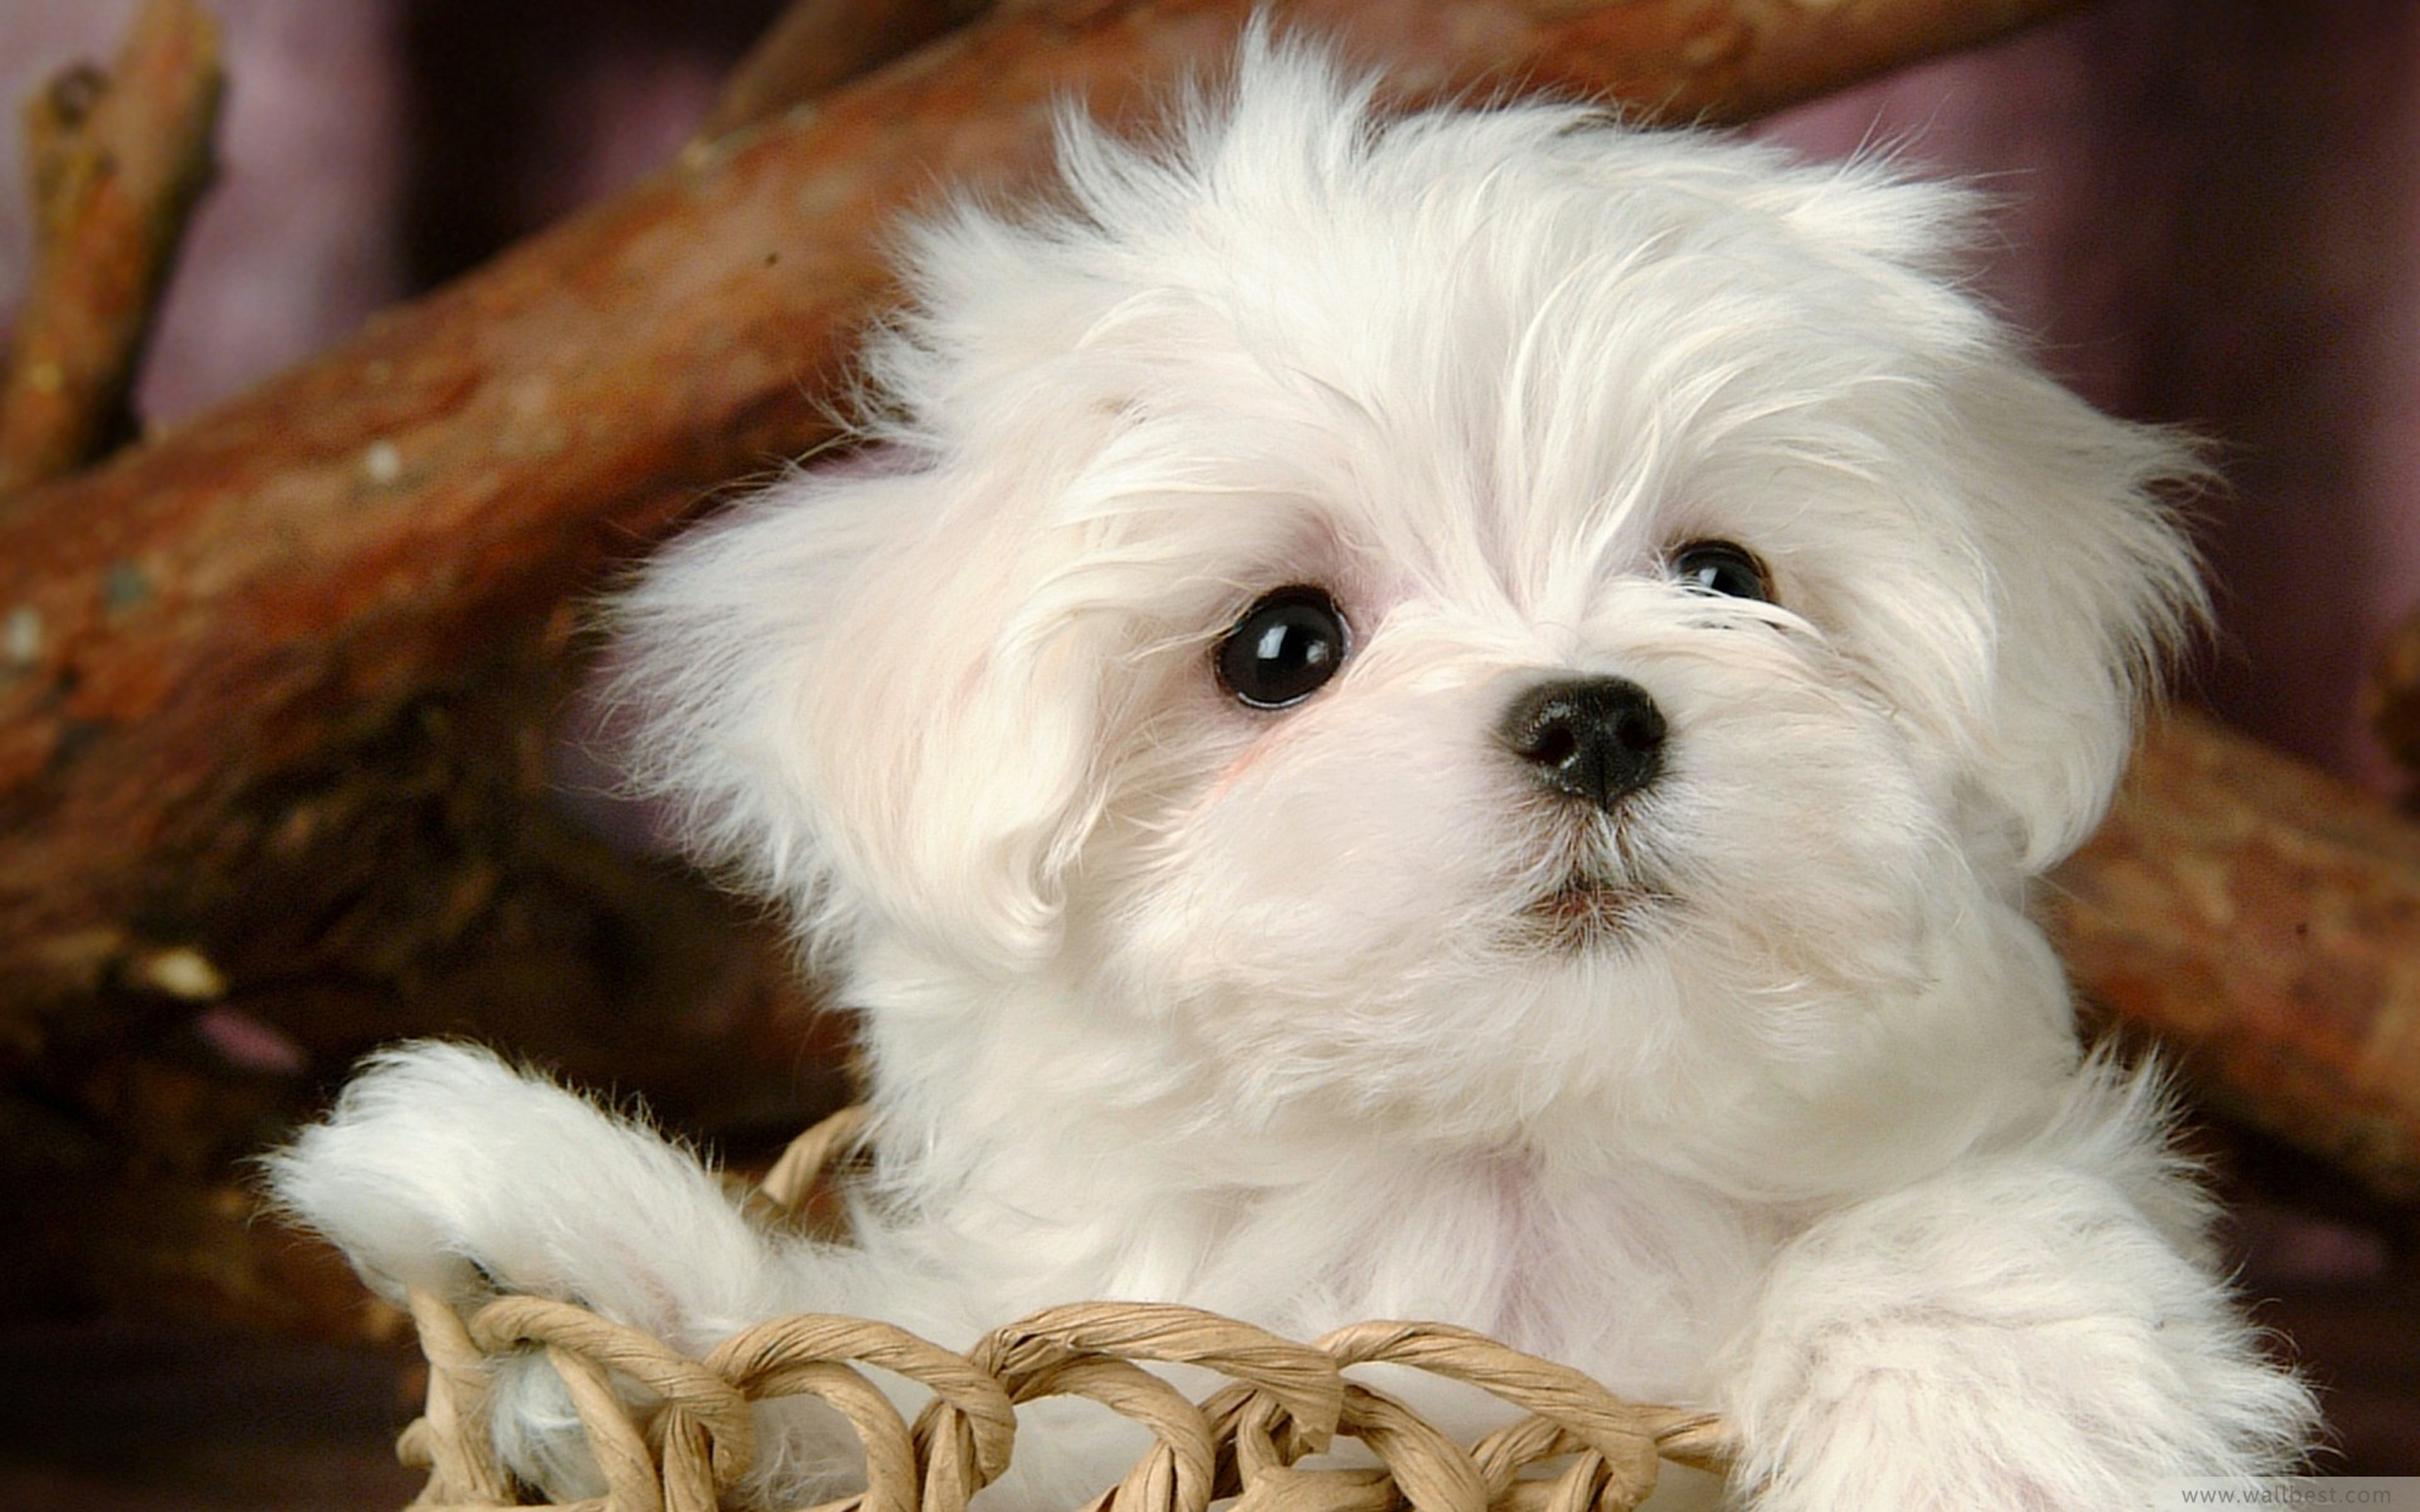

In [ ]:
image=Image.open("/content/doggie.jpg")
text="eye color"
image

In [ ]:
imput=processor(image,text,return_tensors="pt")


In [ ]:
import torch
processor=ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
output=model(**imput)
logits=output.logits
idx=torch.sigmoid(logits).argmax(-1).item()
print("Predicted answer:",model.config.id2label[idx])

Predicted answer: black


In [ ]:
import gradio as gr
from PIL import Image
from transformers import BlipProcessor,BlipForConditionalGeneration
from transformers import GPT2LMHeadModel,GPT2Tokenizer
import torch

In [ ]:


import gradio as gr
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch


caption_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
caption_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


recipe_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
recipe_model = GPT2LMHeadModel.from_pretrained("gpt2")

def image_to_recipe(image):
    image = image.convert("RGB")
    inputs = caption_processor(images=image, return_tensors="pt")
    caption_ids = caption_model.generate(**inputs)
    caption = caption_processor.decode(caption_ids[0], skip_special_tokens=True)


    prompt = f"Write a detailed recipe for: {caption}\n\nIngredients:\n"
    inputs = recipe_tokenizer(prompt, return_tensors="pt")
    output = recipe_model.generate(**inputs, max_length=250, do_sample=True, temperature=0.9)
    recipe = recipe_tokenizer.decode(output[0], skip_special_tokens=True)

    return f"**Caption:** {caption}\n\n **Recipe:**\n{recipe}"

gr.Interface(
    fn=image_to_recipe,
    inputs=gr.Image(type="pil", label="Upload Food Image"),
    outputs=gr.Markdown(),
    title="AI Image to Recipe Generator",
    description="Upload a food image, and the AI will generate a caption + Recipe"
).launch()

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e04ccb9b090426a27c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Saving cheetah.webp to cheetah (1).webp


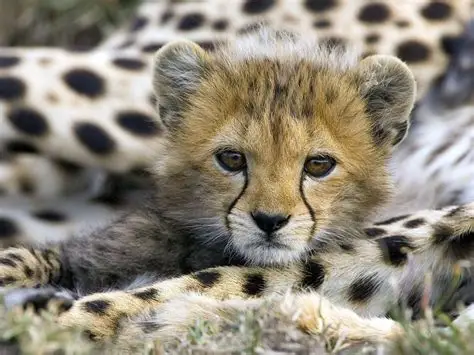

In [ ]:
from transformers import CLIPProcessor,CLIPModel
from PIL import Image
import random
import torch
from google.colab import files
from IPython.display import display,HTML

moods=["happy","sad","chill","dark","energetic","lonely","calm"]

famous_song={
    "happy":[("Happy-bird","https://youtu.be/D4sTViBfjVE?si=aRSp1VaEuOOJL9Qh")],
    "sad":[("sad-deer","https://youtu.be/_CB6W6svwB8?si=ocoui6oSLOYfA49l")],
    "chill":[("chill-cat","https://youtu.be/toTRkovRzvo?si=1eMdRpM-LMywYPgh")],
    "dark":[("dark-lion","https://youtu.be/5vsOv_bcnhs?si=IaTkdDMHFUvErOIz")],
    "energetic":[("energetic-dog","https://youtu.be/nmZNS2C24LU?si=dVfXMpyuwrZBVc-s")],
    "lonely":[("lonely-cubs","https://youtu.be/t8oOYuFd-zw?si=uFgdMmZVzhYeU8n0")],
    "calm":[("calm-elephant","https://youtu.be/atRzwlp0iDk?si=zn9T13ode-vRTVEl")]
}
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# STEP 5: Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert("RGB")

inputs=clip_processor(text=moods, images=image,return_tensors="pt",padding=True)

output=clip_model(**inputs)
probs=output.logits_per_image.softmax(dim=1)
predicted_mood=moods[probs.argmax().item()]

song_title,song_url=random.choice(famous_song[predicted_mood])
display(image)
display(HTML(f"""
<h3>predicted Mood:<span style color=green>{predicted_mood.upper()}</span></h3>
<h4> Recommended Song: <a href="{song_url}" target="_blank">{song_title}</a></h4>
"""))